In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#to find mean
def mean(x_values):
    m,n = x_values.shape
    mean = np.zeros(n,)
    for j in range(n):
        mean[j]  = (np.sum(x_values[:,j]))/m
    return mean

In [ ]:
#to find standard deviation
def std_deviation(x_values,mean):
    m,n = x_values.shape
    summation = np.zeros(n,)
    standard_deviation = np.zeros(n,)
    for j in range(n):
        summation[j] = (np.sum((x_values[:,j]-mean[j])**2))/m
        standard_deviation[j] = math.sqrt(summation[j])
    return standard_deviation

In [ ]:
#implementing the z score normalization
def z_score(x_values):
    m,n = x_values.shape
    avg = mean(x_values)
    standard_deviation = std_deviation(x_values,avg)
    x_modified = np.zeros_like(x_values)
    for j in range(n):
        x_modified[:,j]= ((x_values[:,j]-avg[j])/standard_deviation[j])
    return x_modified

In [ ]:
def z_score(x_values):
    avg = np.mean(x_values,axis=0)
    std_deviation = np.std(x_values,axis=0)
    x = (x_values-avg)/std_deviation
    return x

# Linear regression



In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading all data given
values = np.array(pd.read_csv('linear_regression_train.csv')) #we have to give csv file path here
m, n= values.shape
x_values = values[:, 1]
y_values = values[:, n-1]
test_values = np.array(pd.read_csv('linear_regression_test.csv')) #we have to give csv file path here
x_test = test_values[:, 1]


#user defined function for plotting graph
def plot(X, Y, Y_test):
    plt.scatter( X, Y, c='r', marker='+')
    plt.plot(X, Y_test ,marker='^',c = 'green')
    plt.xlabel('X →')
    plt.ylabel('Y →')
    plt.show()


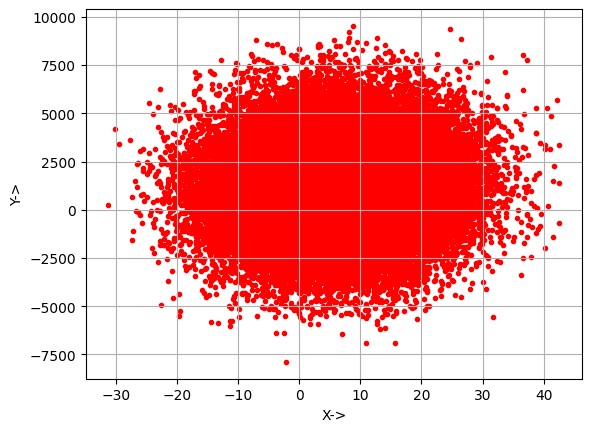

In [ ]:
#plotting the given data to read the data
plt.clf()
plt.scatter(x_values,y_values,c='r',marker='.')
plt.grid(True)
plt.xlabel("X->")
plt.ylabel("Y->")
plt.show()

In [ ]:
#main linear regression function
def linear_regression(x_values,y_values,learn_rate,num_iterations):
    #giving initial values of w and b
    w = -20
    b = 3

    #storing number of training examples from given data set
    m = len(x_values)
    #running the loop for "number of iterations" time
    for i in range(num_iterations):
        #considering the common linear equation y = w*x + b to be applicable here
        y = (w*x_values)+b

        #cost function of linear regression algorithm
        cost_func = ((np.sum((y-y_values)**2))/(2*m))

        #finding the derivative of cost function
        derivative_cost_func_w = ((((np.sum(y-y_values))*x_values[i]))/(m))
        derivative_cost_func_b = ((np.sum(y-y_values))/(m))

        #updating the w and b functions
        w = w - learn_rate*derivative_cost_func_w
        b = b - learn_rate*derivative_cost_func_b

        #calculating the predicted values of y
        y_predicted = w*x_values+b

        #plotting the graph with original value and predicted values
        if ((i%100)==0):
            plt.clf() #chk without this tomorrow
            print("Loss after "+str(i+1)+" is : "+ str(cost_func))
            plot(x_values,y_values,y_predicted)
            plt.clf()
    return w,b

Loss after 1 is : 3296977.2576255705


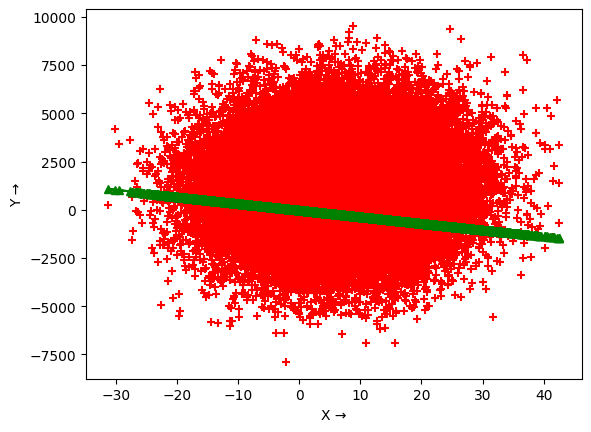

Loss after 101 is : 3909713.3704137965


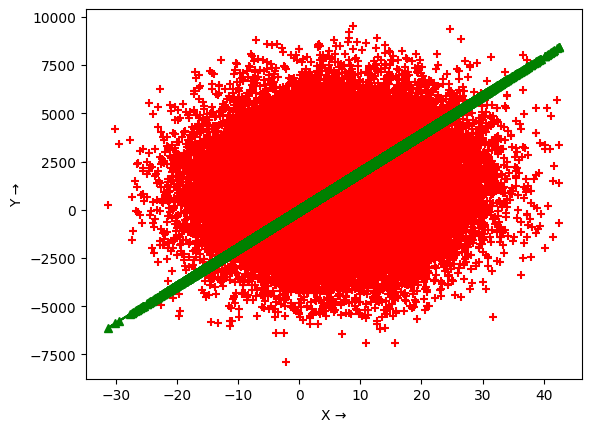

Loss after 201 is : 3977094.636635713


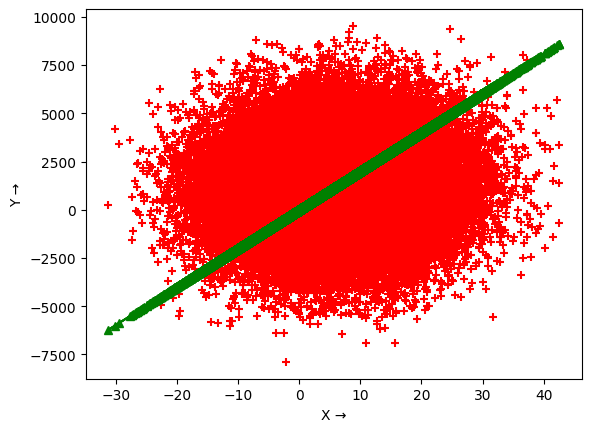

Loss after 301 is : 3977580.861204083


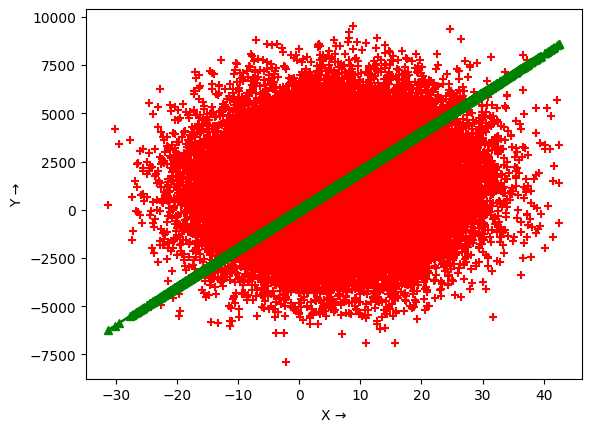

Loss after 401 is : 3977599.3180536875


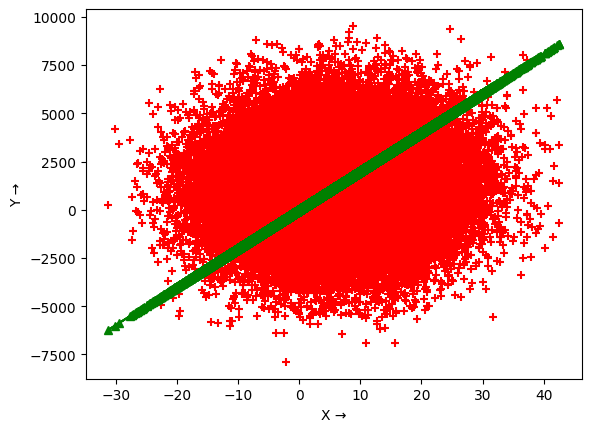

Loss after 501 is : 3977599.7812364465


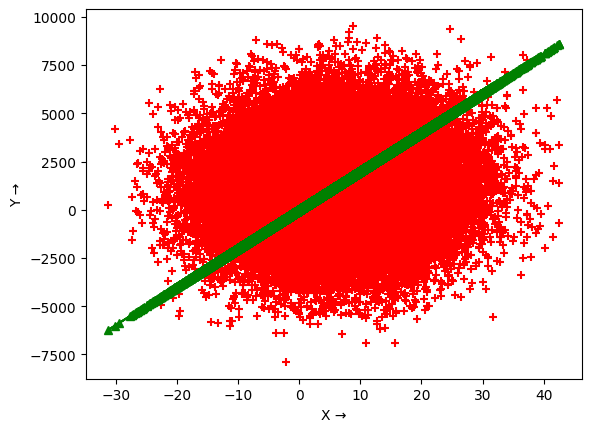

<Figure size 640x480 with 0 Axes>

In [ ]:
#using the user defined linear regression algorithm on data set
W,B = linear_regression(x_values,y_values,0.001,501)

In [ ]:
Y_test = W*x_test+B

In [ ]:
print(f"The predictions are{Y_test}")

The predictions are[-2622.86063293  2804.30538695  1201.92151408 ... -1128.6188392
  4147.4539088    945.71020707]


# Multiple Linear Regression



In [ ]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the data's given
values = np.array(pd.read_csv('linear_regression_train.csv')) #we have to give csv file path here
m, n= values.shape
x_values = values[:, 1:n-1]
y_values = values[:, n-1]
test_values = np.array(pd.read_csv('linear_regression_test.csv')) #we have to give csv file path here
a,b= test_values.shape
x_test = test_values[:, 1:b]
m,n=x_values.shape

#to view the csv file

In [ ]:
#to assign initial values to w and b
w_init = np.zeros(n,)
b_init = 0

In [ ]:
#finding cost function
def cost_func(x_values,y_values,w,b):
    m,n = x_values.shape
    y_predicted=np.zeros(m)
    cost=0
    for i in range(m):
        #finding the predicted value of y (y_cap)
        y_predicted[i] = ((np.dot(w,x_values[i]))+b)
    #finding cost
    cost = np.sum((y_predicted-y_values)**2)
    final_cost = (cost/(2*m))
    return final_cost

In [ ]:
#to find mse
def mse(x_values,y_values,w,b):
    m,n = x_values.shape
    cost = cost_func(x_values,y_values,w,b)
    ms = (cost)*2
    return ms

In [ ]:
def r2(x_values,y_values,w,b):
    m,n = x_values.shape
    y_cap = (np.matmul(x_values,w)+b)
    y_mean = np.sum(y_values)/m
    r2 = np.sum((y_values-y_cap)**2)/np.sum((y_values-y_mean)**2)
    return 1-r2

In [ ]:
#finding the derivative of w and b
def derivative(x_values,y_values,w,b):
    m,n = x_values.shape
    y_predicted = np.zeros(m)
    derivative_w = np.zeros(n)
    derivative_b=0
    #finding the predicted value
    y_predicted = (np.matmul(x_values,w)+b)
    #finding the loss
    loss = (y_predicted-y_values)
    for j in range(n):
        derivative_w[j] = np.sum((loss*x_values[:,j]))
    derivative_b = np.sum(loss)
    derivative_w = derivative_w/m
    derivative_b = derivative_b/m

    return derivative_w,derivative_b

In [ ]:
def gradiant_decent(x_values,y_values,w,b,alpha,num_iterations):
    m,n = x_values.shape
    w_temp = copy.deepcopy(w)
    b_temp = b
    loss_arr = np.zeros(num_iterations)
    #running loop of 'no. of iterations times':
    for i in range(num_iterations):
        #finding derivative of w and b
        derivative_w,derivative_b = derivative(x_values,y_values,w_temp,b_temp)
        #changing the values of w and b
        w_temp = w_temp - (alpha*derivative_w)
        b_temp = b_temp - (alpha*derivative_b)
        #storing the loss
        loss_arr[i]=cost_func(x_values,y_values,w_temp,b_temp)
        #printing the loss
        if(i%50==0):
            loss = cost_func(x_values,y_values,w_temp,b_temp)
            ms = mse(x_values,y_values,w_temp,b_temp)
            print("The loss after "+str(i)+" iterations is "+str(loss)+" and the mse is "+str(ms))
    return w_temp,b_temp,loss_arr

In [ ]:
def multi_linear_regression(x_values,y_values,w,b,alpha,num_iterations):
    m,n = x_values.shape
    loss_array = np.zeros(num_iterations)
    w_tmp,b_tmp,loss_array = gradiant_decent(x_values,y_values,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))
    return w_tmp,b_tmp,loss_array

In [ ]:
w_final = np.zeros(n,)
b_final = 0
losses_array = np.zeros(1200)
x_modified = z_score(x_values)
w_final,b_final,losses_array= multi_linear_regression(x_modified,y_values,w_init,b_init,0.01,1200)

The loss after 0 iterations is 3042998.3063542787 and the mse is 6085996.612708557
The loss after 50 iterations is 1157182.0305645894 and the mse is 2314364.061129179
The loss after 100 iterations is 462896.0642493072 and the mse is 925792.1284986144
The loss after 150 iterations is 207205.30022712031 and the mse is 414410.60045424063
The loss after 200 iterations is 113010.3595334806 and the mse is 226020.7190669612
The loss after 250 iterations is 78298.7860956103 and the mse is 156597.5721912206
The loss after 300 iterations is 65503.39443977602 and the mse is 131006.78887955204
The loss after 350 iterations is 60785.32999619182 and the mse is 121570.65999238363
The loss after 400 iterations is 59045.11197592256 and the mse is 118090.22395184512
The loss after 450 iterations is 58403.0580075563 and the mse is 116806.1160151126
The loss after 500 iterations is 58166.10287346357 and the mse is 116332.20574692714
The loss after 550 iterations is 58078.62743584779 and the mse is 116157.

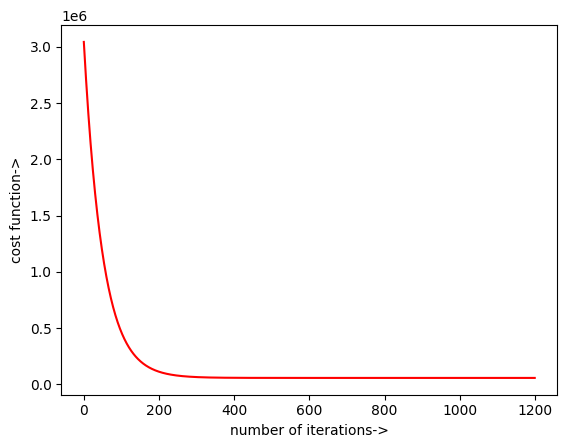

In [ ]:
#plot the graph of iterations vs cost function
plt.plot(np.arange(1200),losses_array,c='r')
plt.xlabel('number of iterations->')
plt.ylabel('cost function->')
plt.show()

In [ ]:
Y_pred=(np.matmul(x_test,w_final)+b_final)
print(f"the predictions for the data are {Y_pred}")

the predictions for the data are [-132717.66343794  -37952.60806445 -139520.41840966 ...  -71864.08652251
 -234155.40771757 -193286.22330814]


# Polynomial Regression



In [ ]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#reading the dataset given
arr = np.array(pd.read_csv('polynomial_regression_train.csv'))
m,n =arr.shape
x_values= arr[:, 1:n-1]
y_values = arr[:,n-1]
arr2 = np.array(pd.read_csv('polynomial_regression_test.csv'))
m2,n2 =arr2.shape
x_test= arr2[:, 1:n2]
m, n = x_values.shape

In [ ]:
#enter the degree of polynomial to find the features
degree = int(input("Enter value of degree : "))

Enter value of degree : 7


In [ ]:
#code to add additional features based on degree
tmp = np.zeros((m,1))
for i in range(degree+1):
    for j in range(degree+1):
        for k in range(degree+1):
            if (i+j+k)>degree or (i+j+k)<=1:
                continue
            else:
                tmp = ((x_values[:,0]**i)*(x_values[:,1]**j)*(x_values[:,2]**k))
                tmp = np.reshape(tmp,(m,1))
                x_values = np.hstack((x_values,tmp))

#assinging value of n
n = x_values.shape[1]

print(x_values.shape)

(48000, 121)


In [ ]:
#to assign initial values to w and b
w_init = np.zeros(n,)
b_init = 0

In [ ]:
#finding cost function
def cost_func(x_values,y_values,w,b):
    m,n =x_values.shape
    y_predicted=np.zeros(m)
    cost=0
    for i in range(m):
        #finding the predicted value of y (y_cap)
        y_predicted[i] = ((np.dot(w,x_values[i]))+b)
    #finding cost
    cost = np.sum((y_predicted-y_values)**2)
    final_cost = (cost/(2*m))
    return final_cost

In [ ]:
#to find rmse
def rmse(x_values,y_values,w,b):
    cost = cost_func(x_values,y_values,w,b)
    rms = math.sqrt((cost)*2)
    return rms

In [ ]:
def r2(x_values,y_values,w,b):
    m,n =x_values.shape
    y_cap = (np.matmul(x_values,w)+b)
    y_mean = np.sum(y_values)/m
    r2 = np.sum((y_values-y_cap)**2)/np.sum((y_values-y_mean)**2)
    return 1-r2

In [ ]:
#finding the derivative of w and b
def derivative(x_values,y_values,w,b):
    m,n =x_values.shape
    y_predicted = np.zeros(m)
    derivative_w = np.zeros(n)
    derivative_b=0
    #finding the predicted value
    y_predicted = np.matmul(x_values,w)
    #finding the loss
    loss = (y_predicted-y_values)
    for j in range(n):
        derivative_w[j] = np.sum((loss*x_values[:,j]))
    derivative_b = np.sum(loss)
    derivative_w = derivative_w/m
    derivative_b = derivative_b/m

    return derivative_w,derivative_b

In [ ]:
#performing he gradient descent for the given values
def gradiant_decent(x_values,y_values,w,b,alpha,num_iterations):
    m,n =x_values.shape
    w_temp = copy.deepcopy(w)
    b_temp = b
    loss_arr = np.zeros(num_iterations,)
    #running loop of 'no. of iterations times':
    for i in range(num_iterations):
        #finding derivative of w and b
        derivative_w,derivative_b = derivative(x_values,y_values,w_temp,b_temp)
        #changing the values of w and b
        w_temp = w_temp - (alpha*derivative_w)
        b_temp = b_temp - (alpha*derivative_b)
        #storing the loss
        loss_arr[i]=cost_func(x_values,y_values,w_temp,b_temp)
        #printing the loss
        if(i%50==0):
            loss = cost_func(x_values,y_values,w_temp,b_temp)
            rms = rmse(x_values,y_values,w_temp,b_temp)
            print("The loss after "+str(i)+" iterations is "+str(loss)+" and the rmse is "+str(rms))
    return w_temp,b_temp,loss_arr

In [ ]:
def polynomial_regression(x_values,y_values,w,b,alpha,num_iterations):
    loss_ar = np.zeros(num_iterations)
    w_tmp,b_tmp,loss_ar = gradiant_decent(x_values,y_values,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))

    fig,ax = plt.subplots()
    ax.plot(loss_ar)
    ax.set_xlabel('number of iterations')
    ax.set_ylabel('cost function')
    plt.show()
    return w_tmp,b_tmp,loss_ar

In [ ]:
num_iterations = int(input("enter number of iterations. : "))

enter number of iterations. : 1200


The loss after 0 iterations is 5.672951663345635e-17 and the rmse is 1.065171503875844e-08
The loss after 50 iterations is 4.3981997911344443e-17 and the rmse is 9.37891229422095e-09
The loss after 100 iterations is 3.7757372491030116e-17 and the rmse is 8.689922035441988e-09
The loss after 150 iterations is 3.446853078331691e-17 and the rmse is 8.30283455011804e-09
The loss after 200 iterations is 3.2604511241277716e-17 and the rmse is 8.075210367696649e-09
The loss after 250 iterations is 3.147891084190797e-17 and the rmse is 7.934596504159235e-09
The loss after 300 iterations is 3.0758827906096647e-17 and the rmse is 7.843319183368308e-09
The loss after 350 iterations is 3.027328625094917e-17 and the rmse is 7.781167810932903e-09
The loss after 400 iterations is 2.992984424077065e-17 and the rmse is 7.736904321596674e-09
The loss after 450 iterations is 2.967613989706672e-17 and the rmse is 7.704043081014893e-09
The loss after 500 iterations is 2.948124789225159e-17 and the rmse is 

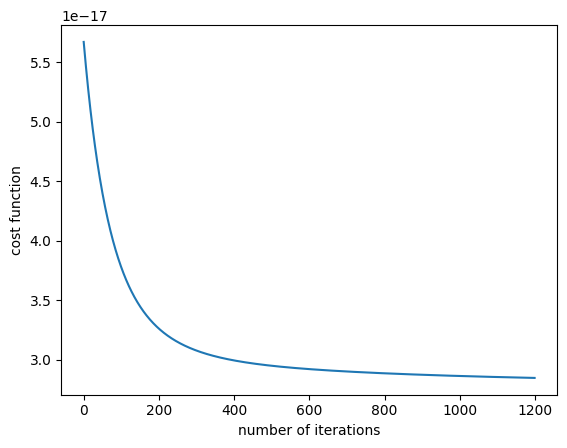

In [ ]:
w_final = np.zeros(n,)
b_final =  0
loss_array = np.zeros(num_iterations,)
x_modified = z_score(x_values)
w_final,b_final,loss_array = polynomial_regression(x_modified,y_values,w_init,b_init,0.001,num_iterations)

In [ ]:
r2(x_modified,y_values,w_final,b_final)

0.5011111598089188

In [ ]:
print(w_final,b_final)
print(loss_array)

[ 3.52208716e-10 -5.59491107e-11  9.07269514e-11  5.32454689e-10
  8.99903357e-11  7.75952924e-11  5.14553302e-11  8.12025263e-11
  2.37436398e-11  7.94145940e-11  5.60523745e-12 -1.97119440e-10
 -2.26639053e-11 -9.62522696e-11 -2.22994210e-11 -4.51906775e-11
 -2.43270842e-11 -4.70649728e-10  2.94700187e-10 -1.16656743e-10
  2.80790556e-10 -6.11220432e-11  2.55766363e-10 -4.82763212e-11
 -5.73166638e-10 -2.36994623e-11 -4.44573581e-10 -2.59446706e-11
 -7.47097816e-10  2.98832361e-10 -3.03822016e-10  2.90315450e-10
 -4.06417775e-11 -7.64466866e-10 -1.27155049e-11 -8.94689508e-10
  2.74972872e-10 -3.80798897e-11  3.78999934e-10  3.51856255e-10
  3.27495775e-10  2.99938386e-10  2.89684904e-10  2.52332318e-10
 -1.45430787e-10 -5.42999655e-11 -2.20866263e-10 -3.86373109e-11
 -2.21643391e-10 -3.54234321e-11 -1.19931785e-10  6.33464029e-10
 -2.33334593e-11  5.83768852e-10 -1.17913333e-11 -3.58145302e-10
  2.61413232e-12 -3.23710560e-10  8.64256288e-12 -2.42098797e-10
  6.48913285e-10 -1.45745

In [ ]:
#plot the graph of iterations vs cost function
'''plt.plot(np.arange(1500),loss_array,c='r')
plt.xlabel('number of iterations->')
plt.ylabel('cost function->')
plt.show()'''

"plt.plot(np.arange(1500),loss_array,c='r')\nplt.xlabel('number of iterations->')\nplt.ylabel('cost function->')\nplt.show()"

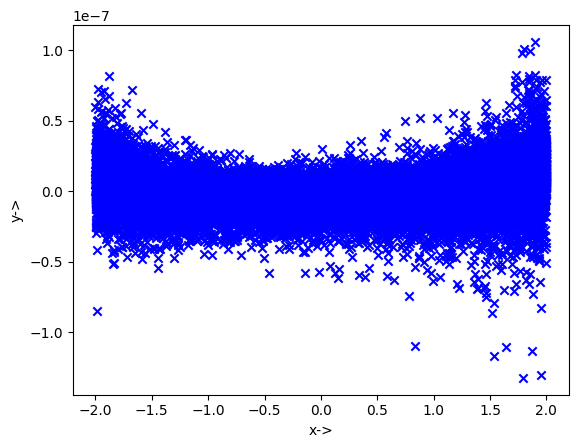

In [ ]:
#plotting y values with respect to feature A
plt.scatter((x_values[:,0]),y_values,c='blue',marker='x')
li =[]
for i in range(n):
    tmp = np.random.randint(-10000,10000)
    li.append(tmp)

#plt.scatter(li,(li*w_final)+b_final,c='blue')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

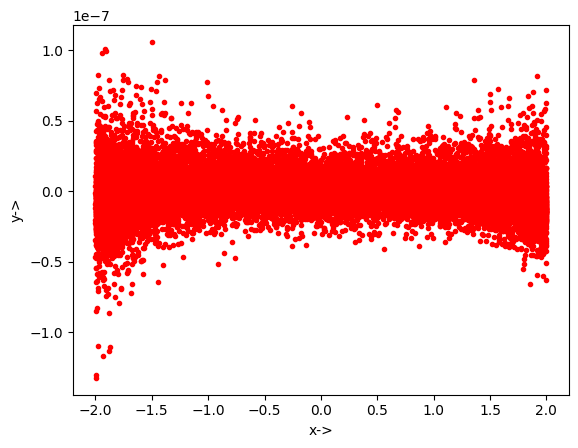

In [ ]:
#ploting y values with respect to feature B
plt.scatter(x_values[:,1],y_values,c='red',marker='.')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

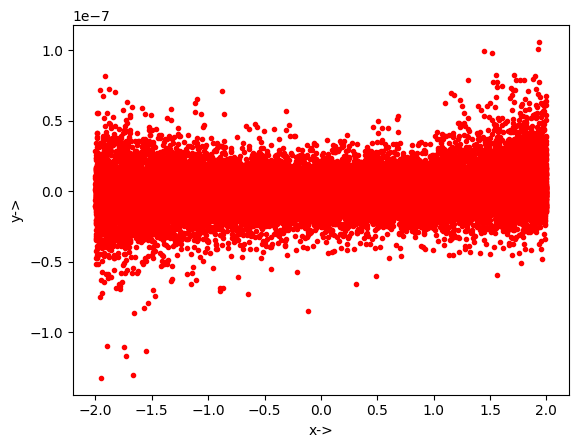

In [ ]:
#ploting y values with respect to feature C
plt.scatter(x_values[:,2],y_values,c='red',marker='.')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

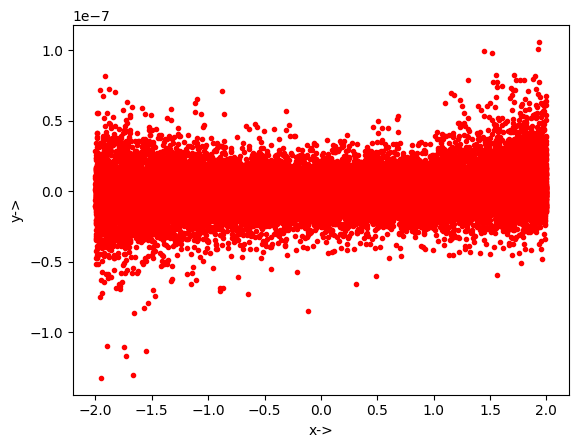

In [ ]:
plt.scatter(x_values[:,2],y_values,c='red',marker='.')
li =[]
for i in range(n):
    tmp = np.random.randint(-10000,10000)
    li.append(tmp)

#plt.scatter(li,(li*w_final)+b_final,c='blue')
plt.xlabel('x->')
plt.ylabel('y->')
plt.show()

In [ ]:
a, b= x_test.shape

tmp = np.zeros((a,1))
for i in range(degree+1):
    for j in range(degree+1):
        for k in range(degree+1):
            if (i+j+k)>degree or (i+j+k)<=1:
                continue
            else:
                tmp = ((x_test[:,0]**i)*(x_test[:,1]**j)*(x_test[:,2]**k))
                tmp = np.reshape(tmp,(a,1))
                x_test = np.hstack((x_test,tmp))


print("Shape of x_test:", x_test.shape)
print("Shape of w_final:", w_final.shape)

Shape of x_test: (12000, 121)
Shape of w_final: (121,)


In [ ]:
Y_test=np.matmul(x_test, w_final) + b_final

In [ ]:
print(Y_test)

[ 6.37404992e-08 -1.96593679e-09 -3.27869761e-10 ... -6.49896779e-09
  1.40459825e-09 -1.11194626e-10]


# Binary Classification

In [ ]:
def sigmoid(x):
  g_z = 1/(1+np.exp(-x))
  return g_z

In [ ]:
arr =np.array(pd.read_csv('binary_classification_train.csv'))

m, n=arr.shape
x_values = arr[:,1:n]
y_values = arr[:,n-1]

In [ ]:
#to assign initial values to w and b
w_init = np.zeros(n)
b_init = 0

In [ ]:
#to creat function
def main_func(x_values,w,b):
    func = np.zeros((m))
    for i in range(m):
        func[i] = sigmoid(np.dot(x_values[i],w)+b)
    return func

In [ ]:
#to find the loss
def cost_func(x_values,y_values,w,b):
    m, n=x_values.shape
    y_predicted = main_func(x_values,w,b)
    loss = (-1/m)*np.sum((y_values*np.log(y_predicted)) + np.sum((1-y_values)*np.log(1-y_predicted)))
    return loss

In [ ]:
#finding the derivative of w and b
def derivative(x_values,y_values,w,b):
    m, n=x_values.shape
    y_predicted = main_func(x_values,w,b)
    loss = y_values-y_predicted
    derivative_w = np.zeros(n)
    derivative_b = 0
    for i in range(n):
        derivative_w[i] = (1/m)*np.sum((loss)*x_values[:,i])
    derivative_b = (1/m)*np.sum(loss)

    return derivative_w,derivative_b

In [ ]:
def gradiant_decent(x_values,y_values,w,b,alpha,num_iterations):
    m, n = x_values.shape
    w_temp = np.zeros(n)
    b_temp = b
    loss_arr = []
    for i in range(num_iterations):
        #finding derivative of w and b
        derivative_w,derivative_b = derivative(x_values,y_values,w_temp,b_temp)
        #changing the values of w and b
        w_temp += alpha*derivative_w
        b_temp += alpha*derivative_b
        #printing the loss
        if(i%50==0):
            loss = cost_func(x_values,y_values,w_temp,b_temp)
            loss_arr.append(loss)
            print("The loss after "+str(i)+" iterations is "+str(loss))
    return w_temp,b_temp,loss_arr

In [ ]:
def logistic_regression(x_values,y_values,w,b,alpha,num_iterations):
    m, n = x_values.shape
    w_tmp = np.zeros_like(w_init)
    b_tmp = np.zeros_like(b_init)
    w_tmp,b_tmp,loss_arr = gradiant_decent(x_values,y_values,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))

    fig,ax = plt.subplots()
    ax.plot(loss_arr)
    ax.set_xlabel('number of iterations')
    ax.set_ylabel('cost function')
    plt.show()

    return w_tmp,b_tmp

The loss after 0 iterations is 21194.809141027086
The loss after 50 iterations is 5217.453742980162
The loss after 100 iterations is 3125.361402520652
The loss after 150 iterations is 2248.419210666929
The loss after 200 iterations is 1752.2168104477623
The loss after 250 iterations is 1430.1363519010763
The loss after 300 iterations is 1204.028579826907
The loss after 350 iterations is 1036.9058953799663
The loss after 400 iterations is 908.6994054164236
The loss after 450 iterations is 807.4934597204415
The loss after 500 iterations is 725.749406024807
The loss after 550 iterations is 658.4656800980064
The loss after 600 iterations is 602.1977041974383
The loss after 650 iterations is 554.4997873640164
The loss after 700 iterations is 513.5904843656557
The loss after 750 iterations is 478.1434637882631
The loss after 800 iterations is 447.1522657779992
The loss after 850 iterations is 419.8402724404506
The loss after 900 iterations is 395.59925724024
The loss after 950 iterations is 

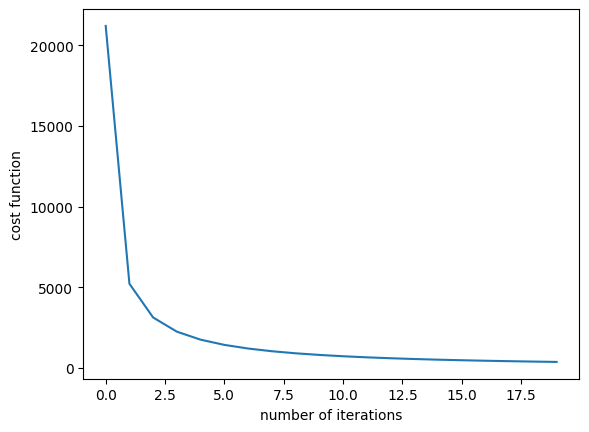

In [ ]:
w_final = np.zeros(n)
b_final = 0
x_modified = z_score(x_values)
w_final,b_final = logistic_regression(x_modified,y_values,w_init,b_init,0.1,1000)

In [ ]:
print(w_final,b_final)

[ 6.97080727e-03 -1.02060657e-02  5.75265346e-03 -2.11171948e-01
  5.34576096e-03  7.33411432e-01  1.65424686e-03  6.46099142e-03
  1.45672682e-01  1.70759972e-02 -2.09762474e-02 -1.51941242e-02
 -4.66910622e-03  1.17377719e-01  2.91696135e-01 -2.08985498e-01
  4.00440531e-01 -2.08322993e-01 -1.08626879e-01 -1.19563881e-02
  3.65473053e+00] -1.6296167686094152


# Multi- Class Classification

In [ ]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#reading the data's given
arr =np.array(pd.read_csv('multi_classification_train.csv'))

m, n=arr.shape
x_values = arr[:,1:n]
y_values = arr[:,n-1]
#for finding number of training examples and number of features
arr2 =np.array(pd.read_csv('multi_classification_test.csv'))
m_test, n_test=arr2.shape
x_values_test = arr2[:,1:n_test]
m,n=x_values.shape
print(f"x values shape {x_values.shape}")

x values shape (48000, 21)


In [ ]:
num_unique = np.unique(y_values)
print((num_unique))
y_classes = np.zeros((m,len(num_unique)))
for j in range(len(num_unique)):
    for i in range(m):
        if y_values[i] == num_unique[j]:
            y_classes[i,j] = 1
y_classes = y_classes.T
print(f"y class shape {y_classes.shape}")

[0. 1. 2. 3. 4.]
y class shape (5, 48000)


In [ ]:
#to assign initial values to w and b
w_init = np.zeros((len(num_unique),n ))
b_init = np.zeros((len(num_unique),1))
print(w_init.shape)

(5, 21)


In [ ]:
#sigmod function
def sigmoid(z):
    answer_func = 1/(1+np.exp(-1*(z)))
    return answer_func

In [ ]:
#to creat function
def main_func(x_values,w,b):
    func = np.zeros((m))
    for i in range(m):
        func[i] = sigmoid(np.dot(x_values[i],w)+b)
    return func

In [ ]:
#to creat function
'''def main_func(x_values,w,b):
    func = np.zeros((m))
    func[i] = sigmoid(np.matmul(x_values,w)+b)
    return func'''

'def main_func(x_values,w,b):\n    func = np.zeros((m))\n    func[i] = sigmoid(np.matmul(x_values,w)+b)\n    return func'

In [ ]:
#to find the loss
def cost_func(x_values,y_values,w,b):
    m, n=x_values.shape
    y_predicted = main_func(x_values,w,b)
    loss = (-1/m)*np.sum(y_values*np.log(y_predicted) + (1-y_values)*np.log(1-y_predicted))
    return loss

In [ ]:
#finding the derivative of w and b
def derivative(x_values,y_values,w,b):
    m, n=x_values.shape
    y_predicted = main_func(x_values,w,b)
    loss = y_values-y_predicted
    derivative_w = np.zeros(n)
    derivative_b = 0
    for i in range(n):
        derivative_w[i] = (1/m)*np.sum((loss)*x_values[:,i])
    derivative_b = (1/m)*np.sum(loss)

    return derivative_w,derivative_b

In [ ]:
print(f"cost function {cost_func(x_values,y_classes[0],w_init[0],b_init[0])}")

<ipython-input-136-91289c42d12b>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  func[i] = sigmoid(np.dot(x_values[i],w)+b)


cost function 0.3024538313784526


In [ ]:
x_modified = z_score(x_values)
print(derivative(x_modified,y_classes[0],w_init[0],b_init[0]))

<ipython-input-136-91289c42d12b>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  func[i] = sigmoid(np.dot(x_values[i],w)+b)


(array([-0.00605792, -0.02658448,  0.02437921, -0.01970428, -0.00100201,
       -0.0009519 , -0.04062801, -0.04165703,  0.05258415, -0.06582015,
       -0.00040278, -0.00040278, -0.05703937, -0.00212847, -0.06233918,
        0.03145817,  0.05625151,  0.02433458,  0.00113638, -0.06582015,
       -0.15292987]), -0.41583333333333333)


In [ ]:
def gradiant_decent(x_values,y_values,w,b,alpha,num_iterations):
    m, n = x_values.shape
    w_temp = copy.deepcopy(w)
    b_temp = b
    loss_arr = []
    for i in range(len(num_unique)):
        #running loop of 'no. of iterations times':
        print("This is for the label : "+str(i))
        for j in range(num_iterations):
            #finding derivative of w and b
            derivative_w,derivative_b = derivative(x_values,y_values[i],w_temp[i],b_temp[i])
            #changing the values of w and b
            for k in range(n):
                w_temp[i,k] += alpha*derivative_w[k]
            b_temp[i] += alpha*derivative_b
            #printing the loss
            if(j%50==0):
                loss = cost_func(x_values,y_values[i],w_temp[i],b_temp[i])
                print("The loss after "+str(j)+" iterations is "+str(loss))
    return w_temp,b_temp

In [ ]:
def logistic_regression(x_values,y_values,w,b,alpha,num_iterations):
    m, n = x_values.shape
    w_tmp = np.zeros_like(w_init)
    b_tmp = np.zeros_like(b_init)
    w_tmp,b_tmp = gradiant_decent(x_values,y_values,w,b,alpha,num_iterations)
    print("The values of w and b are "+str(w_tmp)+" "+str(b_tmp))
    return w_tmp,b_tmp

In [ ]:
w_final = np.zeros_like(w_init)
b_final = np.zeros_like(b_init)
#x_modified = z_score(x_values)
w_final,b_final = logistic_regression(x_modified,y_classes,w_init,b_init,0.1,100)

This is for the label : 0


<ipython-input-136-91289c42d12b>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  func[i] = sigmoid(np.dot(x_values[i],w)+b)


The loss after 0 iterations is 0.2847976585177799
The loss after 50 iterations is 0.15848892721914373
The loss after 100 iterations is 0.1208334882552585
The loss after 150 iterations is 0.10016657045698586
The loss after 200 iterations is 0.08652339439053149
The loss after 250 iterations is 0.07669630764121552
The loss after 300 iterations is 0.06921855015320488
The loss after 350 iterations is 0.0633062808528126
The loss after 400 iterations is 0.05849682408994758
The loss after 450 iterations is 0.054497078516057305
The loss after 500 iterations is 0.051111270352703894
The loss after 550 iterations is 0.048203129234824886
The loss after 600 iterations is 0.04567460775747338
The loss after 650 iterations is 0.04345320912090466
The loss after 700 iterations is 0.04148408617641319
The loss after 750 iterations is 0.039724924830016724
The loss after 800 iterations is 0.03814252305190469
The loss after 850 iterations is 0.0367104402740311
The loss after 900 iterations is 0.03540734361117

KeyboardInterrupt: 

In [ ]:
y_classes_cap = np.zeros_like(y_classes)
y_cap = np.zeros_like(y_values)
for i in range(len(num_unique)):
    y_classes_cap[i] = main_func(x_modified,w_final[i],b_final[i])
for i in range(30000):
    temp = np.argmax(y_classes_cap.T[i])
    y_cap[i] = num_unique[temp]
#for checking accuracy
equal = np.sum(y_cap==y_values)
accuracy = (equal/m)*100
print(accuracy)

# K-NN

In [ ]:
import numpy as np
import pandas as pd
import math

In [ ]:
df = pd.read_csv('/content/multi_classification_train.csv')
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-90.532634,-66.953472,79.261856,-111.800554,126.403549,111.509348,207.728953,-26.600556,-106.229324,...,148.391734,77.835738,-10.728207,1.100625,1.035362,-87.010809,-16.242297,-32.074925,-17.666026,1
1,2,-103.156720,-16.070400,87.819228,12.614599,51.347780,67.483725,40.269172,51.442254,-151.486693,...,29.009475,3.995786,-10.861630,-142.605726,-25.924592,-86.755351,-36.479749,-130.246619,-44.143652,2
2,3,24.326153,-92.098078,82.238354,-56.795879,85.203996,127.916504,-90.080307,-128.124071,18.036020,...,111.810098,65.826018,-101.271203,-44.127749,-7.131464,-105.049759,-130.948256,-43.113523,-37.330448,4
3,4,-64.631737,-83.703583,84.135072,-5.516152,74.338494,112.630556,181.576798,-1.054023,60.469865,...,50.047108,100.439101,-117.842955,150.239788,-144.635542,-144.306209,-69.272905,-79.629675,-51.334456,2
4,5,-55.473830,-78.853237,88.129107,75.200543,76.991520,60.224711,-13.106559,-146.773016,-33.490566,...,85.988282,23.381960,11.876102,-188.296503,-80.323929,-56.757987,-20.314172,-42.625170,-24.102753,2


In [ ]:
df = pd.read_csv('/content/multi_classification_train.csv')
m,n = df.shape
x = df[df.columns[1:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [ ]:
def knn(x,y,x_new,k):
  m,n = x.shape
  distance = np.zeros((m,2))
  for i in range(m):
    distance[i,0] = i
    for j in range(n):
      s = (x_new[j]-x[i,j])**2
      distance[i,1] += s
    distance[i,1] = math.sqrt(distance[i,1])
  distance = distance[np.argsort(distance[:,1])]
  distance = distance[:k]
  uniq,freq = np.unique(distance[:,0],return_counts=True)
  return y[int(uniq[np.argmax(freq)])]

In [ ]:
x_new = np.zeros(n)
for i in range(n):
  print(f"Give the value of feature {i+1} : ")
  x_new[i] = float(input())

Give the value of feature 1 : 
2
Give the value of feature 2 : 
5
Give the value of feature 3 : 
6
Give the value of feature 4 : 
7
Give the value of feature 5 : 
9
Give the value of feature 6 : 
1
Give the value of feature 7 : 
3
Give the value of feature 8 : 
2
Give the value of feature 9 : 
7
Give the value of feature 10 : 
9
Give the value of feature 11 : 
2
Give the value of feature 12 : 
4
Give the value of feature 13 : 
6
Give the value of feature 14 : 
9
Give the value of feature 15 : 
3
Give the value of feature 16 : 
4
Give the value of feature 17 : 
0
Give the value of feature 18 : 
2
Give the value of feature 19 : 
4
Give the value of feature 20 : 
6
Give the value of feature 21 : 
7
Give the value of feature 22 : 
55


In [ ]:
x_new = np.arange(21)
k = int(input("Enter the value of k : "))
print(knn(x,y,x_new,k))

Enter the value of k : 25
4


# K-Means Clustering

In [ ]:
def closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

In [ ]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points =X[idx == k]
        centroids[k] = np.mean(points, axis = 0)

    return centroids

In [ ]:
def plot_kMeans(X, centroids, previous_centroids, idx, K, i):
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', s=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)

    for k in range(K):
        plt.plot([previous_centroids[k, 0], centroids[k, 0]], [previous_centroids[k, 1], centroids[k, 1]], 'k-', linewidth=2)

    plt.title('Iteration: {}'.format(i))
    plt.pause(0.1)

In [ ]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = closest_centroids(X, centroids)
        if plot_progress:
            plot_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [ ]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]

    return centroids

In [ ]:
df = pd.read_csv('unsupervised_data.csv')
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015


K-Means iteration 0/9


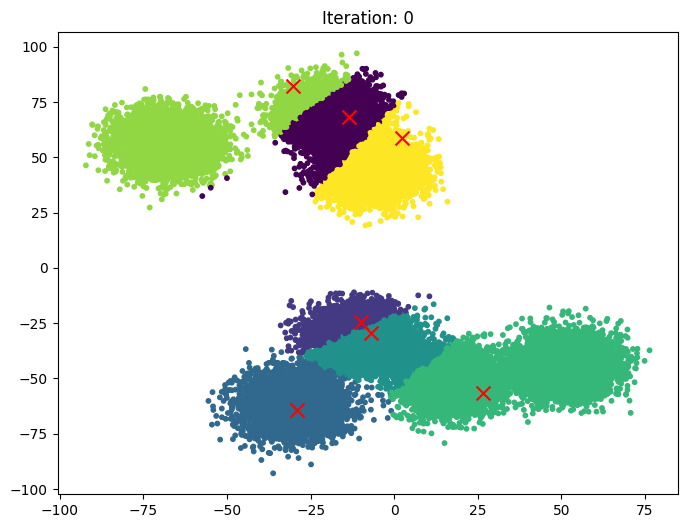

K-Means iteration 1/9


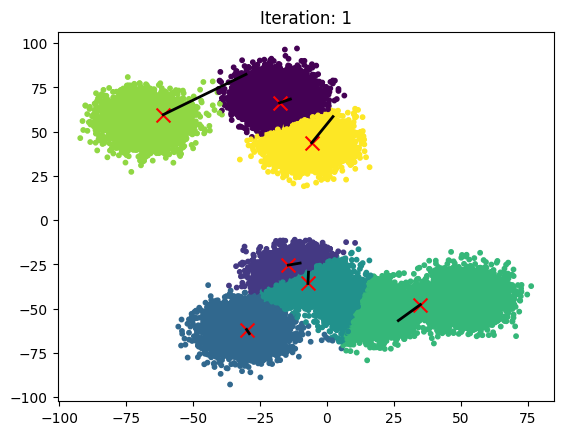

K-Means iteration 2/9


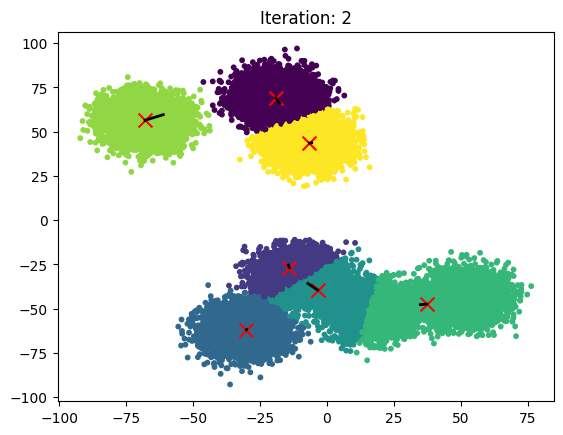

K-Means iteration 3/9


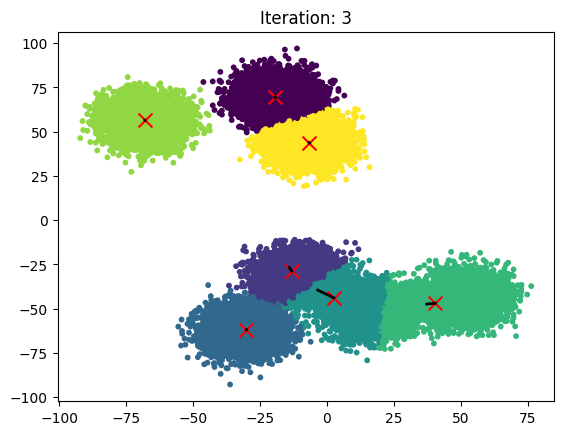

K-Means iteration 4/9


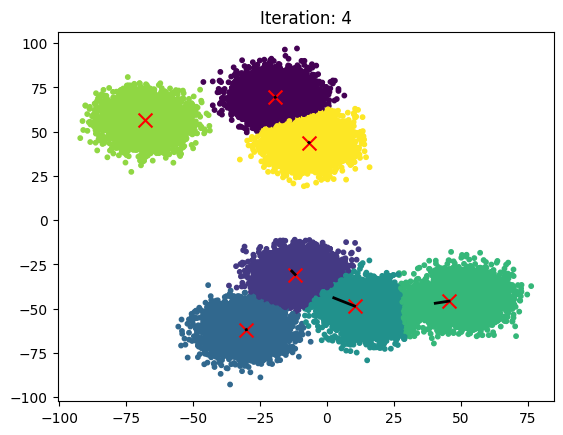

K-Means iteration 5/9


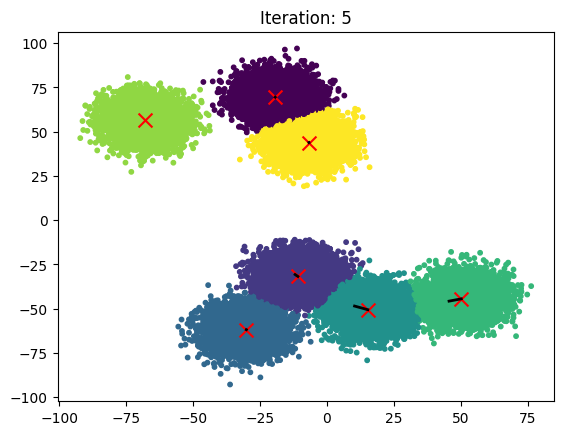

K-Means iteration 6/9


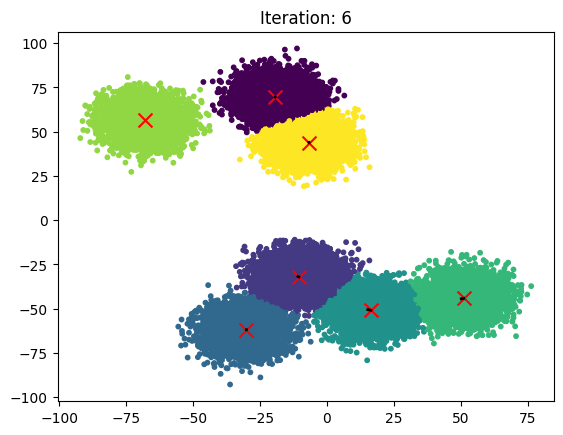

K-Means iteration 7/9


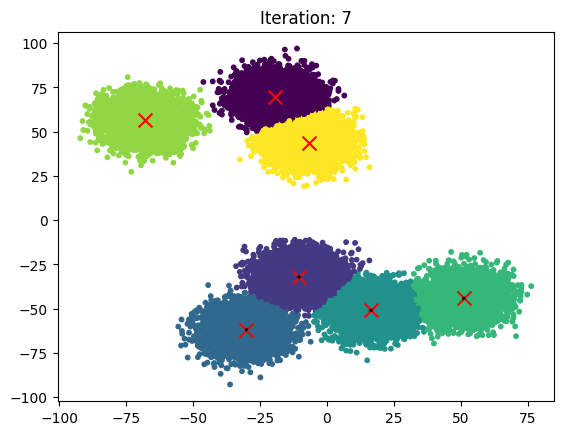

K-Means iteration 8/9


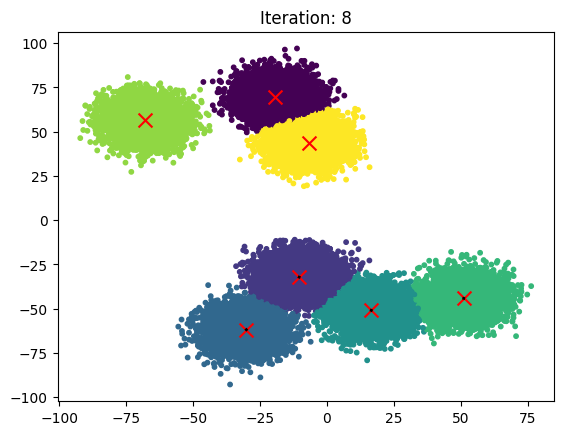

K-Means iteration 9/9


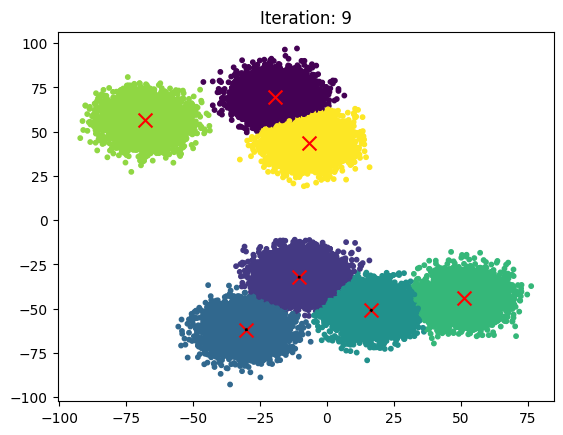

In [ ]:
x = df[df.columns[1:3]].to_numpy()
K = 7
max_iters = 10
initial_centroids = kMeans_init_centroids(x, K)
centroids, idx = run_kMeans(x, initial_centroids, max_iters, plot_progress=True)

# Decision Tree


In [ ]:
def entropy(x):
  entropy = 0
  p = 0
  if len(x) != 0:
    p = len(x[x == 1])/len(x)

  if p == 0 or p == 1:
    entropy = 0

  else:
    entropy = -p*math.log(p,2) - (1-p)*math.log(1-p,2)
  return entropy

In [ ]:
def split_data(X, node_indices, feature):
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)

        else:
            right_indices.append(i)

    return left_indices, right_indices

In [ ]:
def information_gain(x, y, node_indices, feature):
    left_indices, right_indices = split_data(x, node_indices, feature)

    information_gain = 0
    entropy1 = 0.

    if len(left_indices) == 0 or len(right_indices) == 0:
        return 0

    w_left = len(x[left_indices])/len(x[node_indices])
    w_right = len(x[right_indices])/len(x[node_indices])

    entropy1 = (w_left)*(entropy(y[left_indices])) + (w_right)*(entropy(y[right_indices]))

    information_gain = (entropy(y[node_indices])) - (entropy1)

    return information_gain

In [ ]:
def best_split(x, y, node_indices):
    num_features = x.shape[1]
    best_feature = 0

    max_info_gain = 0
    for i in range(num_features):
            info_gain = information_gain(x,y,node_indices,i)
            if max_info_gain < info_gain:
                max_info_gain = info_gain
                best_feature = i

    return best_feature

In [ ]:
def build_tree_recursive(x, y, node_indices, branch_name, max_depth, current_depth):
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return

    best_feature = best_split(x, y, node_indices)

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))

    left_indices, right_indices = split_data(x, node_indices, best_feature)

    build_tree_recursive(x, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(x, y, right_indices, "Right", max_depth, current_depth+1)

In [ ]:
def decision_tree(x,y,max_depth):
  root_indices = np.arange(len(x))
  build_tree_recursive(x, y, root_indices, "Root", max_depth, 0)

In [ ]:
def decision_tree_data():
  path = input("Give the path of data:")
  df = pd.read_csv(path)

  x = df[df.columns[1:-1]].to_numpy()
  y = df[df.columns[-1]].to_numpy()

  max_depth = int(input("Enter the maximum depth:"))

  return (x,y,max_depth)

In [ ]:
x_decision , y_decision , max_depth = decision_tree_data()

Give the path of data:binary_classification_train.csv
Enter the maximum depth:4


In [ ]:
decision_tree(x_decision,y_decision,max_depth)

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 0
-- Depth 2, Left: Split on feature: 0
--- Depth 3, Left: Split on feature: 0
    ---- Left leaf node with indices []
    ---- Right leaf node with indices []
--- Depth 3, Right: Split on feature: 0
    ---- Left leaf node with indices []
    ---- Right leaf node with indices []
-- Depth 2, Right: Split on feature: 0
--- Depth 3, Left: Split on feature: 0
    ---- Left leaf node with indices []
    ---- Right leaf node with indices []
--- Depth 3, Right: Split on feature: 0
    ---- Left leaf node with indices []
    ---- Right leaf node with indices []
- Depth 1, Right: Split on feature: 0
-- Depth 2, Left: Split on feature: 0
--- Depth 3, Left: Split on feature: 0
    ---- Left leaf node with indices []
    ---- Right leaf node with indices []
--- Depth 3, Right: Split on feature: 0
    ---- Left leaf node with indices []
    ---- Right leaf node with indices []
-- Depth 2, Right: Split on feature: 0
--- Depth 3,

# Neural Network


In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def softmax(z):
  exp_z = np.exp(z)
  return (exp_z / np.sum(exp_z, axis=0, keepdims=True))

In [ ]:
def relu(z):
  return (np.maximum(0, z))

In [ ]:
def relu_derivative(z):
  return np.array(z > 0)

In [ ]:
def leaky_relu(z):
  return np.maximum(0.01*z, z)

In [ ]:
def leaky_relu_derivative(z):
  return np.array(z > 0)

In [ ]:
def tanh(z):
  return np.tanh(z)

In [ ]:
def tanh_derivative(z):
  return (1 - np.power(z,2))

In [ ]:
def initial_parameter(layers):
  parameter = {}

  for i in range(1, len(layers)):
    parameter[f"w{i}"] = np.random.randn(layers[i], layers[i - 1]) / np.sqrt(layers[i - 1])
    parameter[f"b{i}"] = np.zeros((layers[i], 1))

  return parameter

In [ ]:
def forward_propagation(x, parameter, activation):
  L = len(parameter) // 2
  forward_cache = {}
  forward_cache = {"a0": x}

  for i in range(1, L):
    forward_cache[f"z{i}"] = np.dot(parameter[f"w{i}"], forward_cache[f"a{i-1}"]) + parameter[f"b{i}"]
    a = activation[i - 1](forward_cache[f"z{i}"])
    forward_cache[f"a{i}"] = a

  forward_cache[f"z{L}"] = np.dot(parameter[f"w{L}"] ,forward_cache[f"a{L - 1}"]) + parameter[f"b{L}"]

  if forward_cache[f"z{L}"].shape[0] == 1:
    forward_cache[f"a{L}"] = sigmoid(forward_cache[f"z{L}"])

  else:
    forward_cache[f"a{L}"] = softmax(forward_cache[f"z{L}"])

  return forward_cache[f"a{L}"], forward_cache

In [ ]:
def nn_cost(a,y):
  m = y.shape[1]
  if y.shape[0] == 1:
    cost = -(1/m)*np.sum(y*np.log(a)+(1 - y)*np.log(1 - a))

  else:
    cost = -(1/m)*np.sum(y*np.log(a))

  cost = np.squeeze(cost)
  return cost

In [ ]:
def backward_propagation(a,y, parameter, forward_cache, activation_derivative):
  gradient = {}
  m = y.shape[1]
  L = len(parameter) // 2

  gradient[f"dz{L}"] = a - y
  gradient[f"dw{L}"] = (1 / m) * np.dot(gradient[f"dz{L}"], forward_cache[f"a{L - 1}"].T)
  gradient[f"db{L}"] = (1 / m) * np.sum(gradient[f"dz{L}"], axis=1, keepdims=True)

  for i in reversed(range(1, L)):
    gradient[f"dz{i}"] = np.dot(parameters[f"w{i + 1}"].T, gradient[f"dz{i + 1}"]) * activation_derivative[i - 1](forward_cache[f"a{i}"])
    gradient[f"dw{i}"] = (1 / m) * np.dot(gradient[f"dz{i}"], forward_cache[f"a{i - 1}"].T)
    gradient[f"db{i}"] = (1 / m) * np.sum(gradient[f"dz{i}"], axis=1, keepdims=True)

  return gradient

In [ ]:
def update_parameter(parameter, gradient, alpha):
  L = len(parameter) // 2

  for i in range(1, L + 1):
    parameter[f"w{i}"] -= alpha * gradient[f"dw{i}"]
    parameter[f"b{i}"] -= alpha * gradient[f"db{i}"]

  return parameter

In [ ]:
def nn(x, y, layers, activation, activation_derivative, alpha, num_itr):
  parameter = initial_parameter(layers)

  for i in range(num_itr):
    a , forward_cache = forward_propagation(x, parameter, activation)
    cost = nn_cost(a, y)
    gradient = backward_propagation(a, y, parameter, forward_cache, activation_derivative)
    parameter = update_parameter(parameter, gradient, alpha)

    if i % 100 == 0:
      print(f"Iteration {i} \t Cost: {cost}")

  return parameter

In [ ]:
def accuracy(x,y,parameter,activaion):
  m,n = y.shape
  predics, forward_cache = forward_propagation(x, parameter, activation)
  if m == 1:
    predics = np.array(predics > 0.5 ,dtype = 'float')

  else:
    y = np.argmax(y, axis=0)
    predics = np.argmax(predics, axis=0)

  return (np.sum(y == predics)/n)

In [ ]:
df = pd.read_csv('/content/multi_classification_train.csv')
df = df.iloc[:500,1:]
m,n = df.shape
n = n-1
x = np.zeros((n,m))
y = np.zeros((1,m))
y[0] = df.iloc[:,-1]
for i in range(n):
  x[i] = df.iloc[:,i]

In [ ]:
def nn_train_data(path):
  path = path.strip("'")
  df = pd.read_csv(path)

  u,v = df.shape
  v -= 2
  a_start = int(input("Enter the starting index of training data:"))
  a_end = int(input("Enter the ending index of training data:"))
  a = a_end - a_start
  x = np.zeros((v,a))
  y = np.zeros((1,a))

  df = df.iloc[a_start:a_end,1:]
  y[0] = df[df.columns[-1]].to_numpy()
  for i in range(v):
    x[i] = df[df.columns[i]].to_numpy()

  return (x,y)

In [ ]:
x,y = nn_train_data('/content/multi_classification_train.csv')

In [ ]:
def multi_to_binary(y):
  a = int(y.max() + 1)
  y_new = np.zeros((a,m))
  for i in range(m):
    y_new[int(y[0,i]),i] = 1
  return y_new

In [ ]:
y = multi_to_binary(y)

In [ ]:
layers = [x.shape[0],10,20, y.shape[0]]
activation = [relu,relu,relu]
activation_derivatives = [relu_derivative,relu_derivative,relu_derivative]

parameter = nn(x,y, layers, activation, activation_derivatives, alpha=0.01, num_itr=2000)

In [ ]:
print(accuracy(x,y,parameter,activation))

In [ ]:
for i in range(1,len(activation)+1):
  print(f"\nlayer{i}\n")
  print(f"w{i} = {parameter[f'w{i}']}")
  print(f"b{i} = {parameter[f'b{i}']}")

In [ ]:
def test(x):
  a,_=forward_propagation(x,parameter,activation)
  return a

In [ ]:
y_hat = test(x)
print(y_hat)

In [ ]:
df = pd.read_csv('/content/binary_classification_train.csv')
df = df.iloc[500:700,1:]
m,n = df.shape
n = n-1
x = np.zeros((n,m))
y = np.zeros((1,m))
y[0] = df.iloc[:,-1]
for i in range(n):
  x[i] = df.iloc[:,i]

y_hat = test(x)
print(y_hat)

In [ ]:
y_hat = np.squeeze(y_hat)
w = 0
for i in range(len(y_hat)):
  if y_hat[i] >= 0.5:
    y_hat[i] = 1
    w += 1
  else:
    y_hat[i] = 0
print(y_hat)
print(w)

In [ ]:
def f1_score_binary(y_hat,y):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  y = np.squeeze(y)
  y_hat = np.squeeze(y_hat)
  for i in range(int(len(y))):
    if y_hat[i] == y[i] == 1:
      tp += 1
    elif y_hat[i] == y[i] == 0:
      tn += 1
    elif y_hat[i] == 0 and y[i] == 1:
      fn += 1
    else:
      fp += 1

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  F1 = 2*precision*recall/(precision+recall)
  return f1,tp,tn,fp,fn

In [ ]:
f1,tp,tn,fn,fp = f1_score_binary(y_hat,y)
print(f1)

In [ ]:
def f1_score_multi(y_hat,y):
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  y = np.squeeze(y)
  y_hat = np.squeeze(y_hat)
  f1 = np.zeros(y.shape[0])
  for i in range(y.shape[0]):
    F1[i],a,b,c,d = f1_score_binary(y_hat[i],y[i])
    tn += a
    tp += b
    fp += c
    fn += d
  precision = tn/(tn+fp)
  recall = tn/(tn+fn)
  f1_macro = np.mean(f1)
  f1_micro = 2*precision*recall/(precision+recall)
  return f1,f1_macro,f1_micro

In [ ]:
f1,f1_macro,f1_micro = f1_score_multi(y_hat,y)
print(f"f1: {f1}")
print(f"macro f1: {f1_macro}")
print(f"micro f1: {f1_micro}")